# 밑바닥부터 시작하는 딥러닝

# Deep Learning from Scratch

딥러닝은 층을 깊게 한 심층 신경망이다. 심층 신경망은 지금까지 설명한 신경망을 바탕으로 뒷단에 층을 추가하기만 하면 만들 수 있지만, 커다란 문제가 몇 개 있다. 이번 장에서는 딥러닝의 특징과 과제, 그리고 가능성을 살펴본다.

# 8.1 더 깊게 

## 8.1.1 더 깊은 신경망으로
이번 절에서는 다음 그림과 같이 구성된 CNN을 만들고자 한다. (VGG 신경망 참고)

![](./img/01.png)
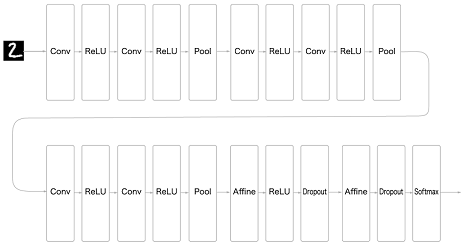

여기에서 사용하는 합성곱 계층은 모두 3 X 3 크기의 작은 필터로, 층이 깊어지면서 채널 수가 더 늘어나는 것이 특징

풀링 계층을 추가하여 중간 데이터의 공간 크기를 점차 줄임

그리고 마지막 단의 완전연결 계층에서는 드롭아웃 계층을 사용

가중치 초깃값을 He 초깃값을 사용, 가중치 매개변수 갱신에는 Adam을 이용한다.

- 3 X 3의 작은 필터를 사용한 합성곱 계층
- 활성화 함수는 ReLU
- 완전연결 계층 뒤에는 드롭아웃 계층 사용
- Adam을 사용해 최적화
- 가중치 초깃값은 'He의 초깃값'

해당 신경망의 정확도는 99.38%로, 잘못 인식할 활률은 겨우 0.62%

![](./img/02.png)

신경망에서 인식하지 못한 이미지는 인간도 판단하기 어려운 이미지

## 8.1.2 정확도를 더 높이려면

What is the class of the image? - 다양한 데이터셋을 대상으로 논문에서 발표한 기법들의 정확도 순위 정리

![](./img/03.png)

상위권 대부분은 CNN 을 기초로 한 기법들이 점령(합성곱 계층 2개에 완전 연결 계층 2개 정도의 신경망)

상위 기법들을 참고하여 정확도를 더 높일 수 있는 기술이 나 힌트 발견

ex) 앙상블 학습, 학습률 감소, 데이터 확장 등등

case 01. 데이터 확장

데이터 확장은 손쉬운 방법이면서도 정확도 개선에 아주 효과적

입력이미지(훈련이미지)를 알고리즘을 동원해 인위적으로 확장

아래 그림과 같이 이미지를 회전하거나 세로로 이동하는 등 미세한 변화를 주어 이미지 갯수를 늘리는 것
(데이터 부족 시 효과적인 수단)

![](./img/04.png)

데이터 확장은 일부를 잘라내는 crop이나 좌우를 뒤집는 flip 등의 방법으로도 확장 가능

일반적인 이미지에는 밝기 등의 외형 변화나 확대/축소 등의 스케일 변화도 효과적임

case 02. 드롭 커넥트 (1등한 기법이니까 한번 살펴보자)

"Regularization of Neural Networks using DropConnect" 라는 논문에서 제안

뉴럴 네트워크에서 드롭아웃(Dropout)의 단점을 보완하고 더 효율적인 정규화(regularization)을 위한 드롭커넥트(DropConnect) 방법을 제안하는 논문

드롭아웃은 레이어 내부의 뉴런을 일부만 임의로 제거해 일종의 앙상블 효과를 내는 방법으로, 일반적으로 과적합(overfitting)을 방지하기 위해 사용됩니다. 하지만 드롭아웃은 인풋과 아웃풋 레이어를 제외한 레이어들에서만 사용될 수 있는 한계

드롭커넥트(DropConnect)는 드롭아웃과 유사한 방법이지만, 뉴런이 제거되는 대신 일부 웨이트(weight) 값을 임의로 0으로 만드는 방식

![](./img/05.png)

드롭커넥트 방식의 장점

1. **앙상블 효과(Ensemble effect):** 드롭커넥트를 적용하면 랜덤하게 선택된 가중치의 값을 공유함으로써 앙상블 효과를 얻을 수 있음. 랜덤하게 선택된 가중치들의 조합으로 이루어진 서로 다른 모델들이 학습이 모델들은 동일한 네트워크 구조이지만 각각 다른 가중치들을 가지게 됨. 드롭커넥트를 사용함으로써 효율적인 앙상블 효과를 얻을 수 있음
2. **일반화 능력 개선(Improved generalization):** 드롭커넥트를 사용하면 랜덤하게 일부 가중치들이 0이 되기 때문에, 뉴런이 제거되는 것과 마찬가지로 네트워크 내부의 불규칙적인 패턴들을 제거하여 일반화 능력이 개선될 수 있음

3. **뉴런과 가중치간 균형(Balance between neurons and weights):** 드롭커넥트 방식은 뉴런이 아닌 가중치를 랜덤하게 선택해 0으로 만드는 방식이므로, 뉴런과 가중치간의 균형을 맞출 수 있으며 이런 균형을 맞추면서 네트워크의 학습 역시 더욱 효과적일 수 있음
4. **노이즈 제거(Noise reduction):** 드롭커넥트는 일부 웨이트 값을 임의로 0으로 변환함으로써 입력 데이터의 미세한 요소들을 제외시킴으로써 노이즈 제거 효과를 가져올수 있으며 이는 모델의 예측 성능을 높여줄 수 있음

따라서, 이러한 장점들 때문에 드롭커넥트는 드롭아웃 대안으로서 더욱 효율적이고 융통성 있는 모델 정규화 방법으로 사용됨

앙상블 효과 : 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 처리한다.
특히, 모델 하나로 원하는 성능을 낼 수 없을 때 앙상블 학습을 사용하면 효과적인데, 개별로 학습한 여러 개의 모델을 조합하여 일반화(generalization) 성능을 향상 시킬 수 있다

![](./img/06.png)

## 8.1.3 깊게 하는 이유

지금까지 CNN을 깊게 하는 이유는 무엇일까?

ILSVRC로 대표되는 대규모 이미지 인식 대회 결과에서 상위를 차지한 기법은 대부분 딥러닝 기반이며

그 경향은 신경망을 더 깊게 만드는 방향으로 가고 있음. 층의 깊이에 비례해 정확도가 좋아짐

층을 깊게 할때의 이점

매개 변수 수가 줄어듬.
- 층을 깊게 한 신경망은 깊지 않은 경우보다 적은 매개변수로 같은 수준의 표현력을 달성

![](./img/07.png)

그림 상 5 by 5 필터로 구성된 합성곱 계층에서는 당연히 출력노드는 입력 데이터의 5 by 5 크기 영역에서 계산

![](./img/08.png)

그림처럼 5 by 5 의 합성곱 연산 1회는 3 by 3 합성곱 연산을 2회 수행하여 대체 가능

5 by 5 합성곱 연산의 매개변수 수는 25개 (5 * 5), 3 by 3 (2 * 3 * 3) 합성곱 연산의 매개변수 수는 18개

매개변수는 층을 반복할수록 적어지며  차이는 층이 깊어질 수록 커짐

ex)7 by 7 합성곱 연산의 매개변수 수는 49개 (5 * 5), 3 by 3 합성곱 3회 반복 (3 * 3 * 3) 합성곱 연산의 매개변수 수는 27개


작은 필터를 겹쳐 심층 신경망을 구성하면 여러 개의 작은 필터 연산이 결합되어 큰 필터와 같은 효과를 낼 수 있음

이를 통해 큰 필터 연산을 수행하는 것보다 덜 연산량이 들어가고, 더욱 빠르게 결과를 얻을 수 있음

게다가 작은 필터들은 지역적인 패턴을 잘 잡아낼 수 있는데 필터 크기를 줄이면서도 지역적인 패턴을 잘 학습할 수 있음

이것은 일반화 성능(generalization performance)을 높이는데 도움을 주게 되는데 타겟팅 하는 패턴의 크기나 위치가 달라져도 활용할 수 있기 때문

작은 필터를 사용하면서도 더 깊은 신경망을 구성하게 되므로, 특징 추출(feature extraction)의 다양성이 증가하고, 결국 성능을 높이는데 기여하는데 도움을 줌

따라서, 작은 필터를 겹치는 것은 신경망의 레이어 수를 늘리지 않고도 연산량을 감소시키고, 일반화 성능을 향상시키는데 효과적인 방법

합성곱 계층에서는 에지 등 단순한 패턴에 뉴런이 반응하고 층이 깊어 지면서 텍스처와 사물의 일부와 같이 점차 더 복잡한 것에 반응 (7.6절)

![](./img/26.png)

'개'를 인식하는 문제가 있을때 얕은 신경망에서 해결하려면 합성곱 쳬층은 개의 특징 대부분을 한번에 이해해야 함.

개의 특징을 이해하려면 변화가 풍부하고 많은 학습데이터가 필요하고 결과적으로 학습 시간이 오래 걸림

신경망을 깊게 학습하면 문제를 계층적으로 분해 가능. 각 층이 학습해야 할 문제를 더 단순한 문제로 대체

ex) 첫번째 층은 에지 학습 두번째 층은 텍스처 학습 세번째 층은 사물의 일부 학습 등등

층을 깊게 하면 정보를 계층적으로 전달 할수 있다는 점도 중요

에지를 추출한 층의 다음층은 에지 정보를 쓸 수 있고, 고도의 패턴을 효과적으로 학습하리라 기대.

층을 깊이 함으로써 각 층이 학습해야 할 문제를 풀기 쉬운 단순한 문제로 분해하여 효율적으로 학습